> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Data Analysis Movies 
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as pit 
import seaborn as sns 
%matplotlib inline 

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# movie dataset
dl= pd.read_csv('tmdb-movies.csv')
dl.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
# show the shape of  dataset
dl.shape

(10866, 21)

In [5]:
# Getting more details 
dl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

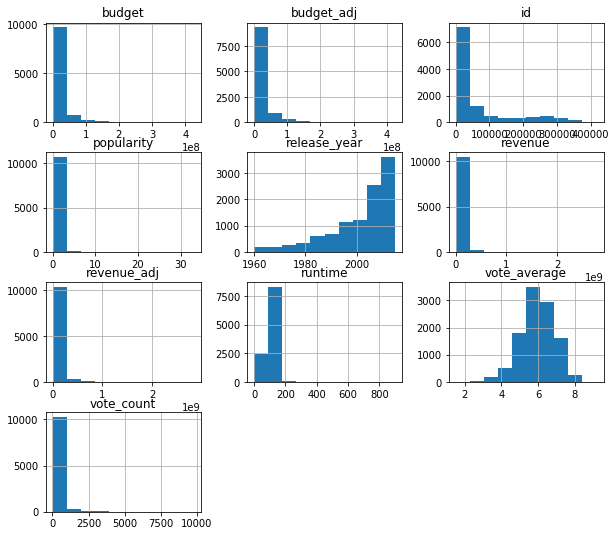

In [7]:
dl.hist(figsize=(10 , 9 ));

In [8]:
dl.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning 
1- drop some columns i do not need.
2- remove duplicates.
3- change data type release_date. 
4- removing empty values.
5- replacing 0 values with NaN, and removing.
6- inserting column 'PROFIT'. 
7- inserting new column 'Actor' , and extract the Actor from column cast.

In [9]:
# drop some columns i do not need
dl.drop(['id','imdb_id','budget','revenue','homepage','director','tagline','keywords','overview','production_companies','vote_count','vote_average'], axis = 1,  inplace = True)


In [10]:
dl.head()

,popularity,original_title,cast,runtime,genres,release_date,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,3/18/15,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,4/1/15,2015,1.747999e+08,1.385749e+09


In [11]:
dl.duplicated().sum()


1

In [12]:
# remove duplicates
dl.drop_duplicates(inplace=True)

In [13]:
dl.duplicated().sum()


0

In [14]:
# change data type release_date 
dl[ 'release_date' ]= pd.to_datetime(dl['release_date'])

In [15]:
dl.head()

,popularity,original_title,cast,runtime,genres,release_date,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,2015-03-18,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,2015-04-01,2015,1.747999e+08,1.385749e+09


In [16]:
# Checking
dl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   popularity      10865 non-null  float64       
 1   original_title  10865 non-null  object        
 2   cast            10789 non-null  object        
 3   runtime         10865 non-null  int64         
 4   genres          10842 non-null  object        
 5   release_date    10865 non-null  datetime64[ns]
 6   release_year    10865 non-null  int64         
 7   budget_adj      10865 non-null  float64       
 8   revenue_adj     10865 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 848.8+ KB


In [17]:
# removing empty values
dl.dropna(subset=['genres'], inplace = True)

In [18]:
# replacing 0 values with NaN , and removing 
dl = dl.replace(0 , np.NaN)
dl = dl.dropna()

In [19]:
dl[[ 'popularity','runtime','budget_adj', 'revenue_adj']]=dl[['popularity','runtime','budget_adj', 'revenue_adj']].applymap(np.int64)

In [20]:
# inserting column 'PROFIT' 
dl.insert(9 ,'PROFIT',dl['revenue_adj']-dl['budget_adj'])


In [21]:
dl.head()

,popularity,original_title,cast,runtime,genres,release_date,release_year,budget_adj,revenue_adj,PROFIT
0,32,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015,137999939,1392445892,1254445953
1,28,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015,137999939,348161292,210161353
2,13,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,2015-03-18,2015,101199955,271619025,170419070
3,11,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015,183999919,1902723129,1718723210
4,9,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,2015-04-01,2015,174799923,1385748801,1210948878


In [22]:
# inserting new column 'Actor' , and extract the Actor from column cast
dl['Actor']= dl.cast.apply(lambda x : x.split('|')[0])


In [23]:
dl.head()

,popularity,original_title,cast,runtime,genres,release_date,release_year,budget_adj,revenue_adj,PROFIT,Actor
0,32,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015,137999939,1392445892,1254445953,Chris Pratt
1,28,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015,137999939,348161292,210161353,Tom Hardy
2,13,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,2015-03-18,2015,101199955,271619025,170419070,Shailene Woodley
3,11,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015,183999919,1902723129,1718723210,Harrison Ford
4,9,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,2015-04-01,2015,174799923,1385748801,1210948878,Vin Diesel


In [24]:
dl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3850 entries, 0 to 10848
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   popularity      3850 non-null   int64         
 1   original_title  3850 non-null   object        
 2   cast            3850 non-null   object        
 3   runtime         3850 non-null   int64         
 4   genres          3850 non-null   object        
 5   release_date    3850 non-null   datetime64[ns]
 6   release_year    3850 non-null   int64         
 7   budget_adj      3850 non-null   int64         
 8   revenue_adj     3850 non-null   int64         
 9   PROFIT          3850 non-null   int64         
 10  Actor           3850 non-null   object        
dtypes: datetime64[ns](1), int64(6), object(4)
memory usage: 360.9+ KB


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Which genres are most popular from year to year?)

In [25]:
# Create dataframe that have earned at least $50000000 in profits

pc = ['original_title' , 'cast' , 'genres' , 'budget_adj' , 'revenue_adj' , 'runtime']
profit_dl =dl.query('PROFIT > 50000000')[pc]


In [26]:
 # Convert column, and storing the values separately 
def c_count(column) :
    data=profit_dl[column].str.cat(sep = '|')
    data=pd.Series(data.split('|'))
    count=data.value_counts(ascending = False)
    
    return count

In [27]:
# viewing first 5 values
count=c_count('genres')
count.head()

Drama        579
Comedy       554
Action       515
Thriller     462
Adventure    418
dtype: int64

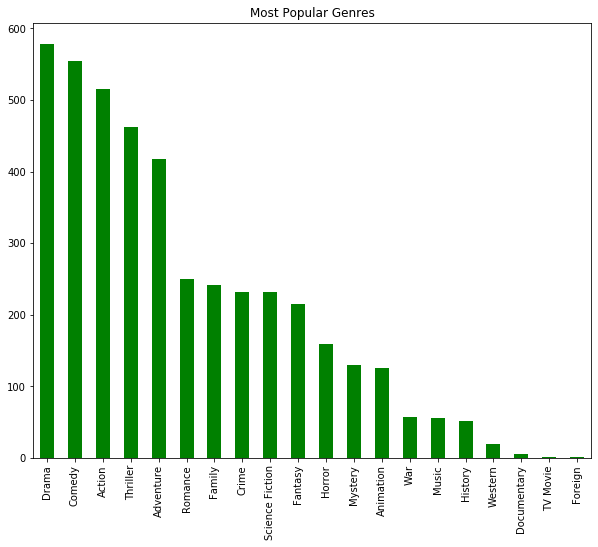

In [28]:
count.plot(kind='bar', figsize = (10, 8), color = 'green')
x = pit.gca()
x.set_title("Most Popular Genres");


### Research Question 2  (What kinds of properties are associated with movies that have high revenues?)

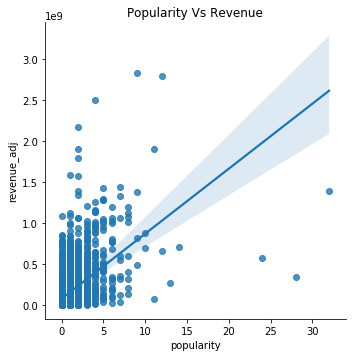

In [29]:
# Relationship of popularity and revenue
sns.lmplot(x='popularity',y='revenue_adj', data=dl)
x=pit.gca()
x.set_title("Popularity Vs Revenue");


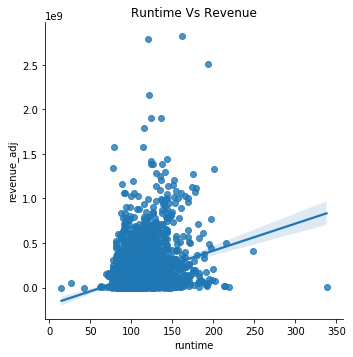

In [30]:
# Relationship of runtime and revenue
sns.lmplot(x='runtime', y='revenue_adj', data=dl)
x=pit.gca()
x.set_title("Runtime Vs Revenue");

In [31]:
# Investigate leading actor's average contirbution on each single movie
# Find out the corresponding average value

actor_rev=dl.groupby(['Actor'])['revenue_adj'].sum() / dl.groupby(['Actor'])['revenue_adj'].count()



Text(0.5, 1.0, ' Actor Vs Revenue')

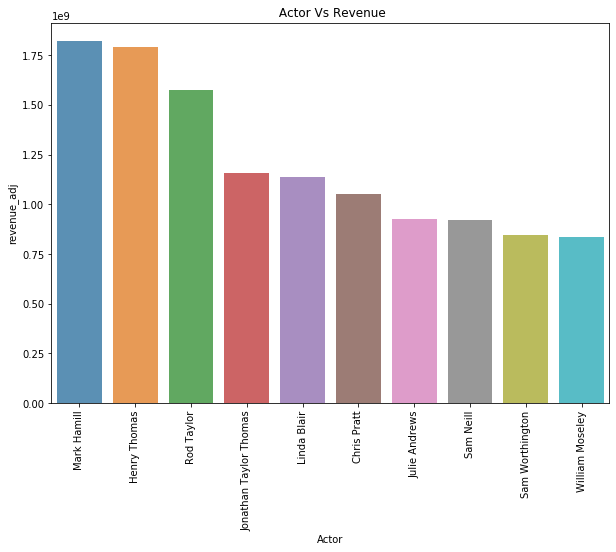

In [32]:
 # Select the top ten actors to plot

actor_rev = actor_rev.nlargest(n = 10)
pit.subplots(figsize = (10,7))
pit.xticks(rotation=90)
x = sns.barplot(actor_rev.index,actor_rev.tolist(), alpha = 0.8)
x.set_ylabel('revenue_adj');
x.set_title(' Actor Vs Revenue')

In [33]:
# Investigate relationship of release year and revenue
# Find out the corresponding average value

r_rev=dl.groupby(['release_year'])['revenue_adj'].sum()/dl.groupby(['release_year'])['revenue_adj'].count()



Text(0.5, 1.0, 'Release Year Vs Revenue')

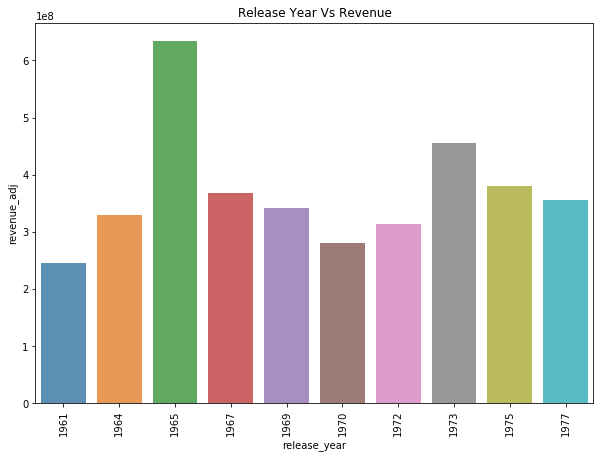

In [34]:
# Select the top ten years to plot

r_rev = r_rev.nlargest(n = 10)
pit.subplots(figsize = (10,7))
pit.xticks(rotation=90)
x = sns.barplot(r_rev.index,r_rev.tolist(), alpha = 0.8)
x.set_ylabel('revenue_adj');
x.set_title('Release Year Vs Revenue')

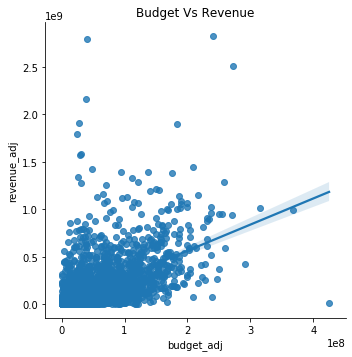

In [35]:
# Relationship of budget and revenue

sns.lmplot(x='budget_adj', y='revenue_adj', data=dl)
x = pit.gca()
x.set_title("Budget Vs Revenue");

<a id='conclusions'></a>
## Conclusions
A successful movie requires a be in the genre of Drama, Comedy, Action, Thriller, Adventure, requires a budget 200 - 300 million US dollars, and runtime 120 minutes. 
## limitations :
some data is missing as 'Actor' and ' PROFIT' to prove findings 
I have some hindrance such as duplicate values , empty value 

